# GRIP_TASK 3

## Author : Shrivathsa N V

## What is a Profit Model?

### A profit model refers to a company’s plan that aims to make the business profitable and viable. It lays out what the company plans to manufacture or provide, how sales will be generated, and all the expenses that the business will incur in a bid to make the model viable. Without a concrete profit model, the business will be operating blindly and will be much less likely to become profitable.

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:

df = pd.read_csv('SampleSuperstore.csv')
print("Data imported successfully")
df

Data imported successfully


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
# To check whether it contains null value or not
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

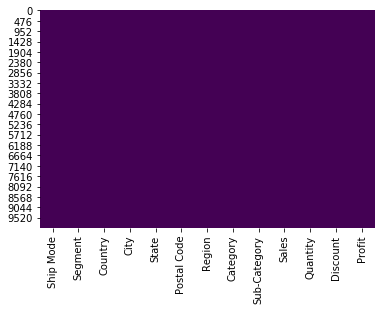

In [5]:
import seaborn as sns
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [6]:
numerical = ['Postal Code','Sales','Quantity','Discount','Profit']
categorical = ['Ship Mode','Segment','Country','City','State','Region','Category','Sub-Category']
df = df[numerical+categorical]

## Analyzing Numerical Variable¶


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018DCE75E9E8>,
      dtype=object)

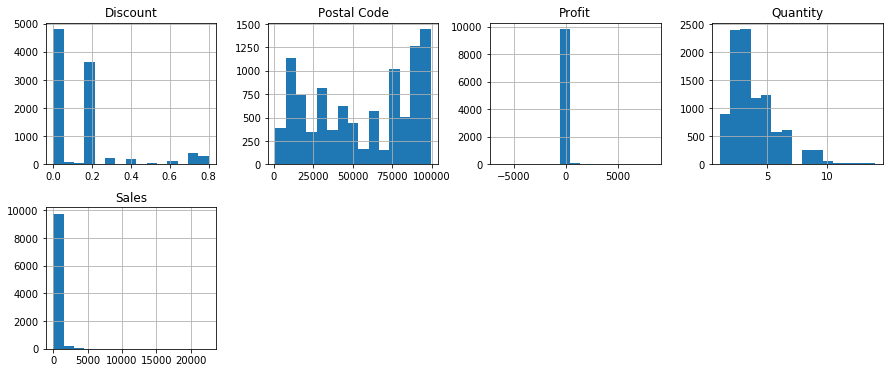

In [7]:
df[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4))

## Analyzing Categorical data

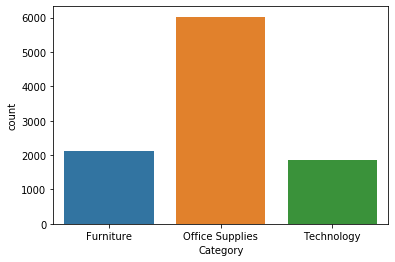

In [8]:
sns.countplot(df['Category']);

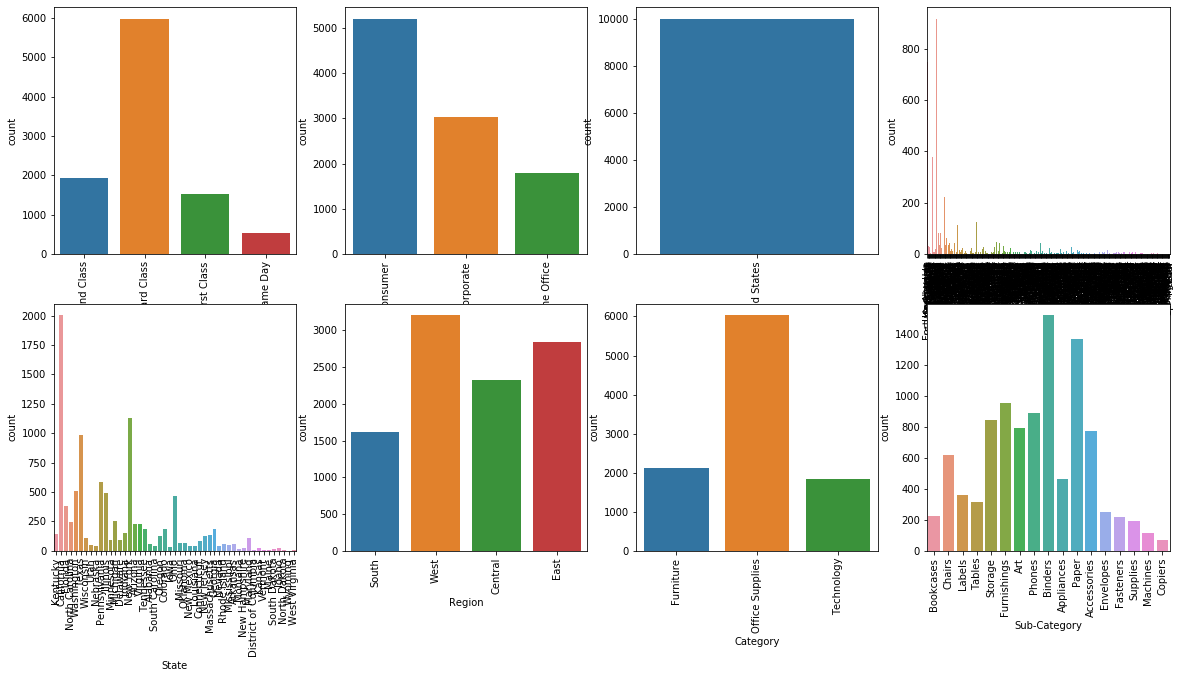

In [9]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

## Analyzing the relationship between Numerical data

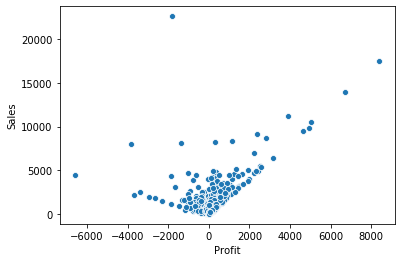

In [10]:
# Profit vs Sales
sns.scatterplot(x=df['Profit'], y=df['Sales'])

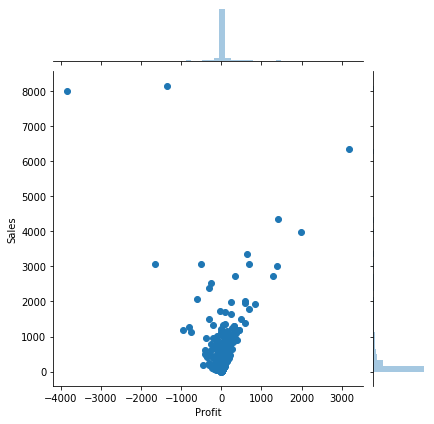

In [11]:

# jointplot which gives two distplots
sns.jointplot(x=df['Profit'].head(1000),y=df["Sales"].head(1000),data=df)

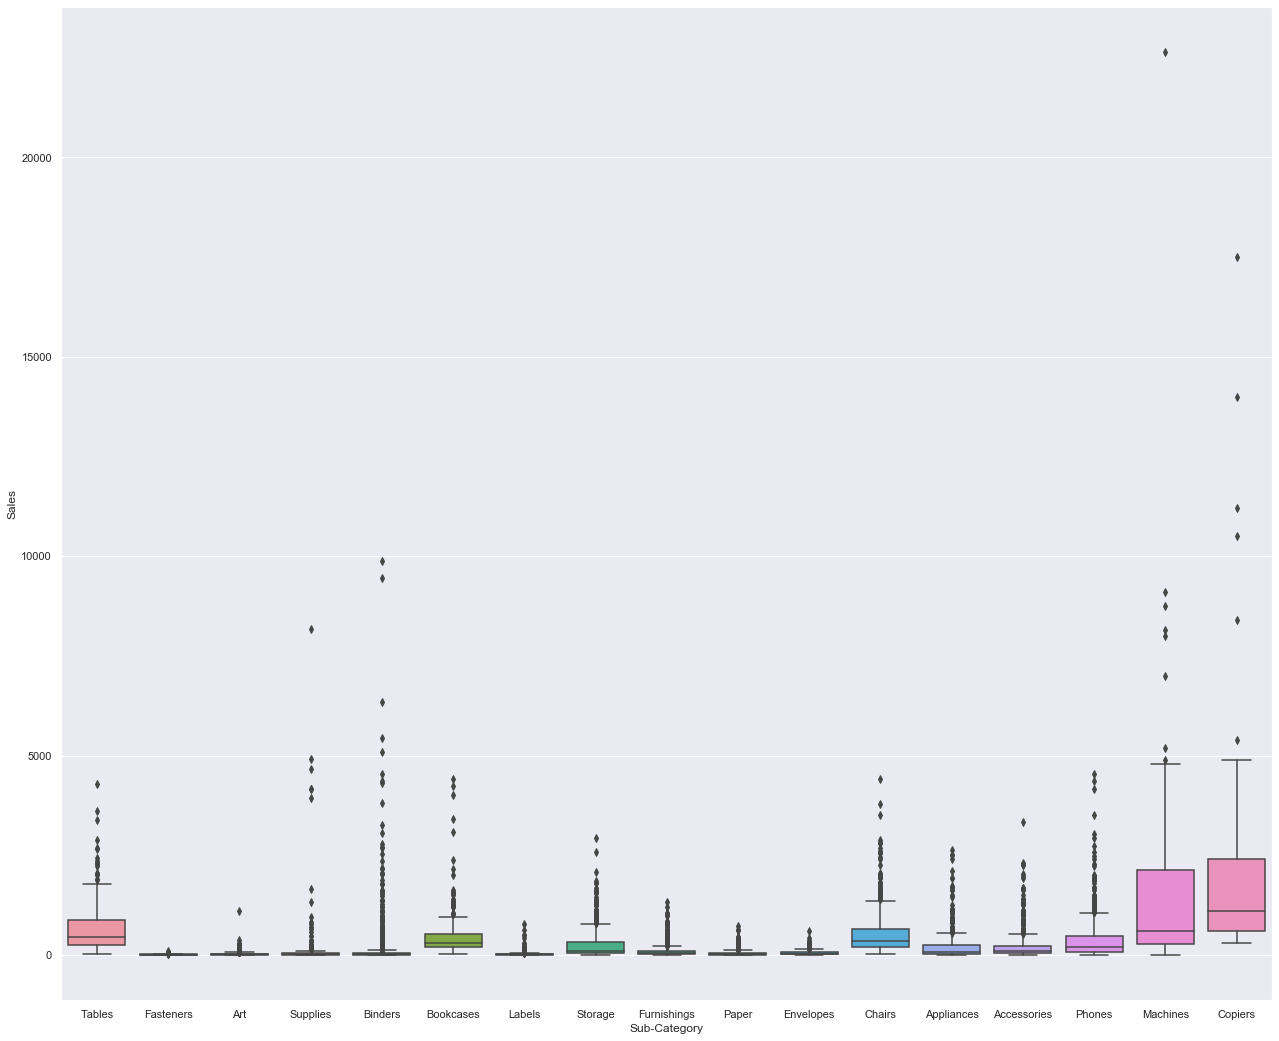

In [12]:

sns.set(rc={'figure.figsize':(21.7,18.27)})
sorted_nb = df.groupby(['Sub-Category'])['Profit'].median().sort_values()
sns.boxplot(x=df['Sub-Category'], y=df['Sales'], order=list(sorted_nb.index))

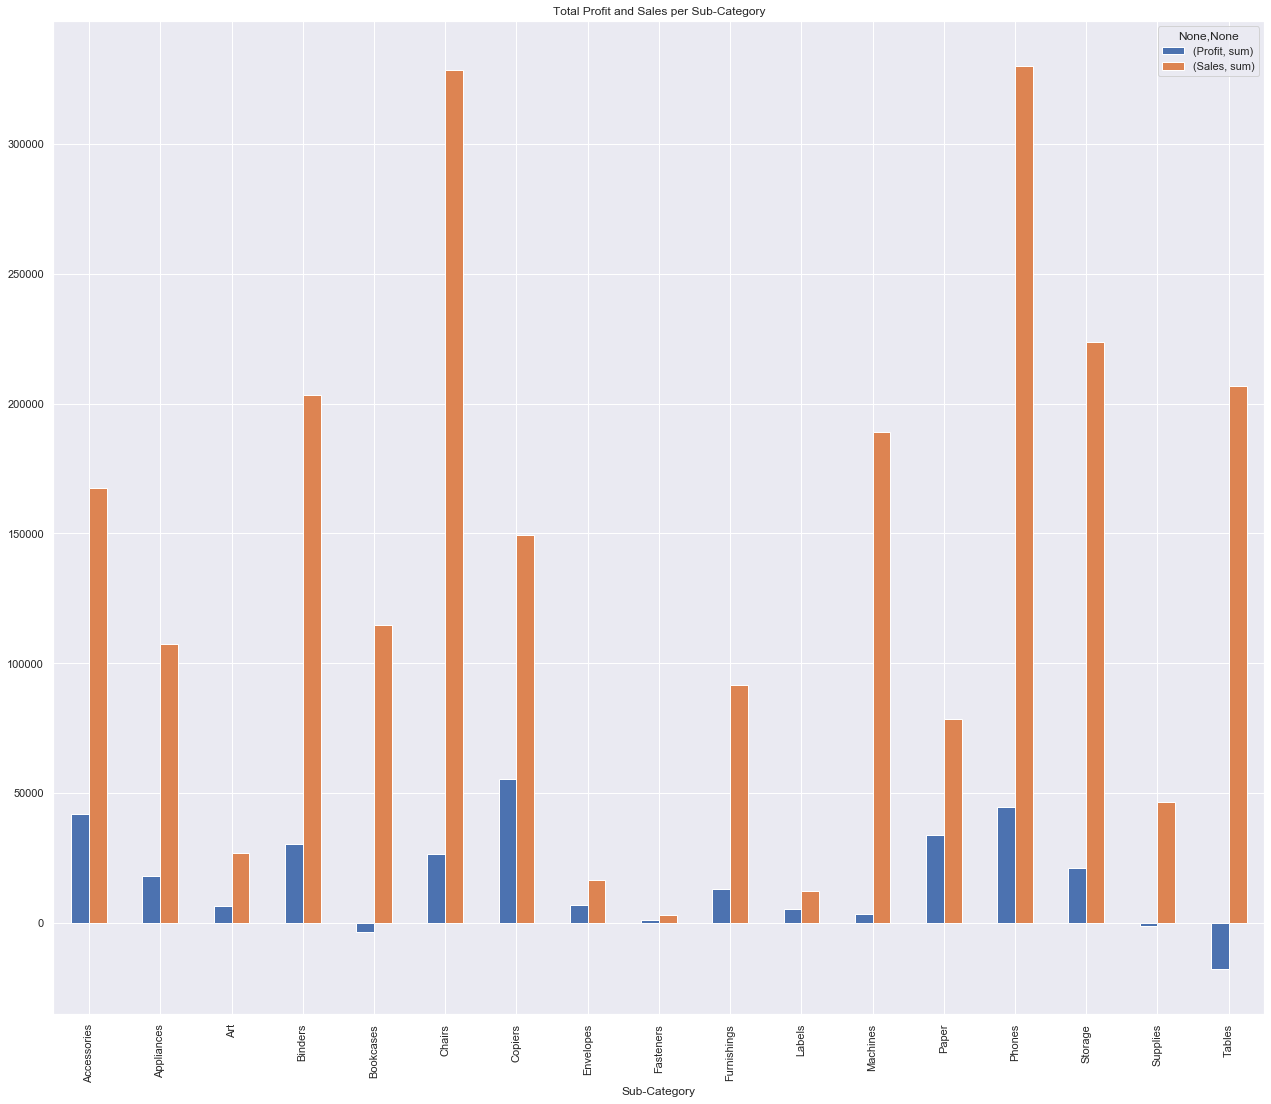

In [13]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

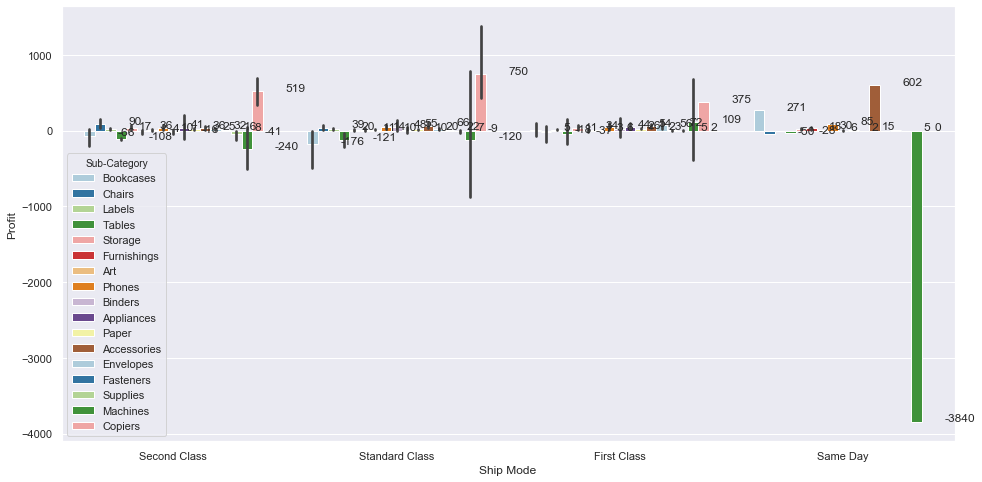

In [14]:
#Calculating Profit gained in each Category based on Ship Mode
fig=plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.barplot(df['Ship Mode'].head(1000),df['Profit'].head(1000),hue=df['Sub-Category'].head(1000),palette='Paired',data=df)
for o in ax.patches:
    ax.annotate('{:.0f}'.format(o.get_height()), (o.get_x()+0.15, o.get_height()+1))
plt.show()

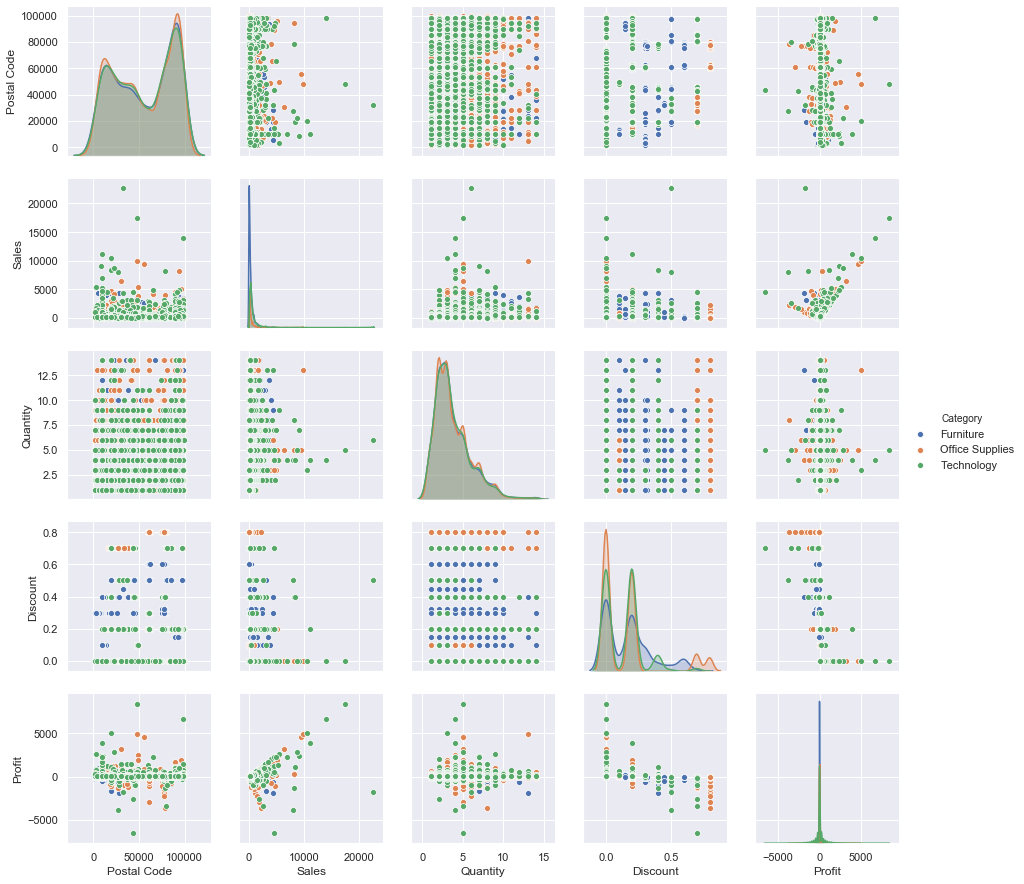

In [15]:
sns.pairplot(df,hue='Category')

In [61]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


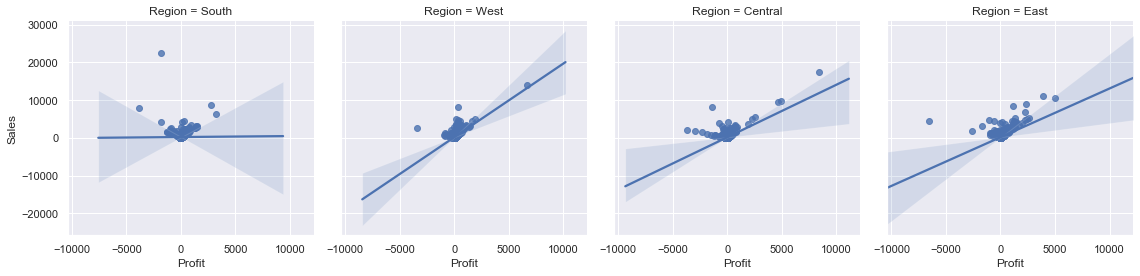

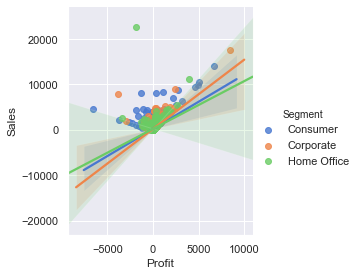

In [17]:

# Show the results of a linear regression within each dataset
sns.lmplot(x="Profit", y="Sales",data=df,palette="muted", height=4,col='Region'
           )
sns.lmplot(x="Profit", y="Sales",data=df,palette="muted", height=4,hue='Segment'
           )

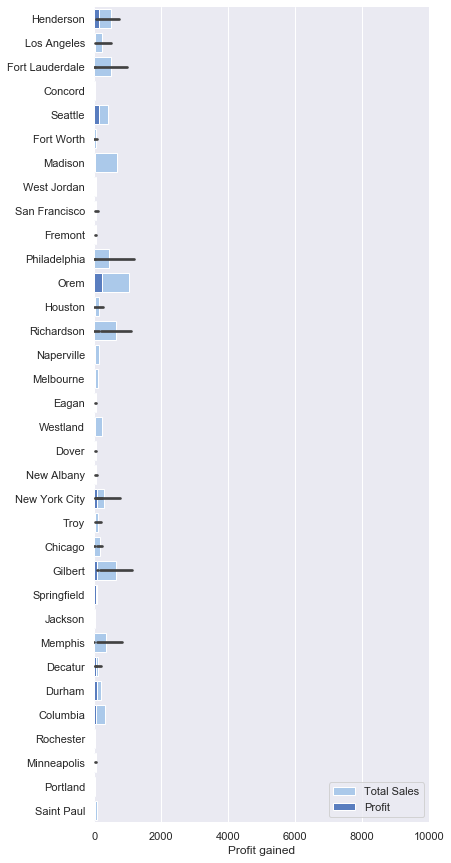

In [18]:

f,ax = plt.subplots(figsize=(6,15))
sns.set_color_codes("pastel")
sns.barplot(x="Sales",y="City",data = df.head(100),label="Total Sales",color='b')

sns.set_color_codes('muted')
sns.barplot(x="Profit",y="City",data = df.head(100),label="Profit",color='b')

ax.legend(loc="lower right")
ax.set(xlim=(0, 10000), ylabel="",
       xlabel="Profit gained")
sns.despine(left=True, bottom=True)

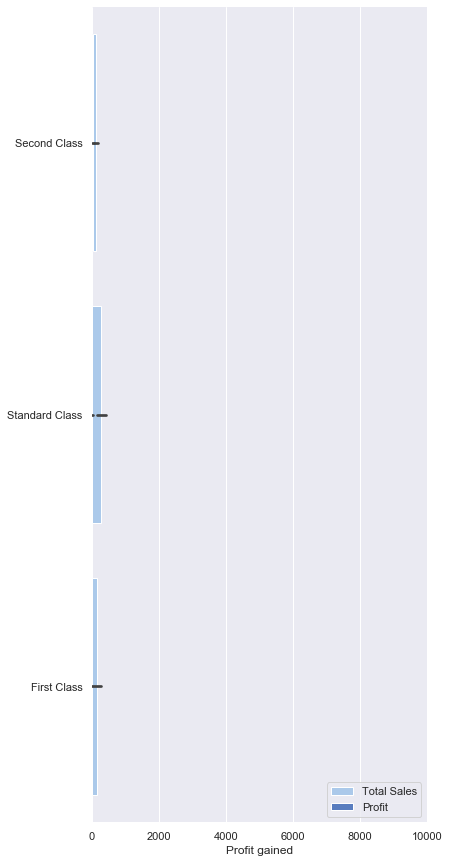

In [19]:
# ship mo# ship mode vs Profit

f,ax = plt.subplots(figsize=(6,15))
sns.set_color_codes("pastel")
sns.barplot(x="Sales",y="Ship Mode",data = df.head(100),label="Total Sales",color='b')

sns.set_color_codes('muted')
sns.barplot(x="Profit",y="Ship Mode",data = df.head(100),label="Profit",color='b')

ax.legend(loc="lower right")
ax.set(xlim=(0, 10000), ylabel="",
       xlabel="Profit gained")
sns.despine(left=True, bottom=True)

# THANK YOU